In [78]:
# The reference of the code below is hw5 programming assignment
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve

In [79]:
df = pd.read_csv('data_drop_null.csv')
df1 = df.to_numpy()
X = df1[:,:-1]
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)
Y = df1[:,-1:].reshape(X.shape[0],)
weight_results = []
acc_train_results = []
acc_test_results = []

In [80]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [81]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_smote, Y_smote = smote.fit_resample(X_train,Y_train)
X_train, Y_train = X_smote, Y_smote

In [82]:
from sklearn import metrics

In [83]:
def plot_acc(acc_train, acc_test, lamb):
    labels = ['0.001', '0.01', '0.1', '1', '10', '100']
    x = np.arange(len(labels))
    width = 0.35
    fig, ax = plt.subplots()
    train_bar = ax.bar(x - width/2, acc_train, width, label='training',color = '#85C1E9')
    test_bar = ax.bar(x + width/2, acc_test, width, label='testing', color = '#F5B7B1')
    ax.set_ylabel('Accuracy')
    ax.set_xlabel('Lambda')
    ax.set_title('Accuracy vs lambda')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    train_bar[acc_train.index(max(acc_train))].set_color('#2874A6')
    test_bar[acc_test.index(max(acc_test))].set_color('#B03A2E')
    print("training max accuracy:", max(acc_train))
    print("test max accuracy:", max(acc_test))
    plt.show()

In [84]:
def plot_pre(prec, recal, fscore,lamb):
    labels = ['0.001', '0.01', '0.1', '1', '10', '100']
    x = np.arange(len(labels))
    width = 0.25
    fig, ax = plt.subplots()
    prec_bar = ax.bar(x - width, prec, width, label='precision',color = '#85C1E9')
    recal_bar = ax.bar(x, recal, width, label='recall', color = '#F5B7B1')
    fscore_bar = ax.bar(x + width, fscore, width, label='fscore', color = '#F9E79F')
    ax.set_ylabel('Precision/recall/fscore')
    ax.set_xlabel('Lambda')
    ax.set_title('Precision/recall/fscore vs lambda')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    prec_bar[prec.index(max(prec))].set_color('#2874A6')
    recal_bar[recal.index(max(recal))].set_color('#B03A2E')
    fscore_bar[fscore.index(max(fscore))].set_color('#F1C40F')
    print("max precision:", max(prec))
    print("max recall:", max(recal))
    print("max fscore:", max(fscore))
    plt.show()

In [85]:
def plot_weight(acc_test, weight):
    max_acc = max(acc_test)
    index = acc_test.index(max_acc)
    print(max_acc, lamb[index])
    weight[index]
    plt.bar([i for i in range(len(weight[0]))],weight[index])
    plt.title("Weight of features")

In [86]:
from sklearn.metrics import log_loss
def plot_learning_curve(model, X_train, Y_train, X_test, Y_test):
    
    acc_train, acc_test = [], []
    step = 500
    for m in range(X_train.shape[0]//step,len(X_train),X_train.shape[0]//step):
        model.fit(X_train[:m,:], Y_train[:m])
        acc_train.append(model.score(X_train, Y_train))
        acc_test.append(model.score(X_test, Y_test))
        
    plt.plot([m for m in range(X_train.shape[0]//step,len(X_train),X_train.shape[0]//step)],acc_train, label = 'Training accuracy', color='purple')
    plt.plot([m for m in range(X_train.shape[0]//step,len(X_train),X_train.shape[0]//step)], acc_test, label = 'Test accuracy', color='orange')
    plt.xlabel('Train size')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

In [87]:
def logreg_model(c , X_train, Y_train, X_test, Y_test):
    logreg = linear_model.LogisticRegression(penalty='l1', C=c, solver= 'saga', max_iter=4000)
    logreg.fit(X_train, Y_train)
    Yhat_train = logreg.predict(X_train)
    acc_train = logreg.score(X_train, Y_train)
    acc_train_logreg.append(acc_train)
    
    Yhat_test = logreg.predict(X_test)
    acc_test = logreg.score(X_test, Y_test)
    acc_test_logreg.append(acc_test)
    weight_logreg.append(np.append(logreg.coef_[0],logreg.intercept_[0]))

    prec, recal, fscore, support = precision_recall_fscore_support(Y_train,  Yhat_train, average = 'binary')
    prec_logreg.append(prec)
    recal_logreg.append(recal)
    fscore_logreg.append(fscore)
    return logreg

In [88]:
lamb = [0.001,0.01,0.1,1,10,100]
cVals = [1/i for i in lamb]
acc_train_logreg = [] 
acc_test_logreg = []
weight_logreg=[]
intercept_logreg=[]
prec_logreg=[]
recal_logreg=[]
fscore_logreg=[]
for c in cVals:
    logreg_model(c, X_train, Y_train, X_test, Y_test)
weight_results.extend(weight_logreg)
acc_train_results.append(acc_train_logreg)
acc_test_results.append(acc_test_logreg)

0.7823223570190642 1


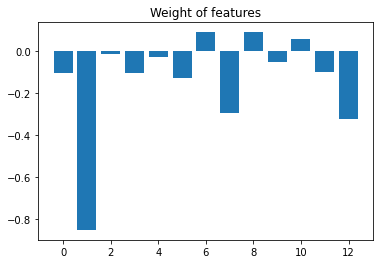

In [89]:
plot_weight(acc_test_logreg, weight_logreg)

max precision: 0.7629596809924679
max recall: 0.6132175761871014
max fscore: 0.6795601806400943


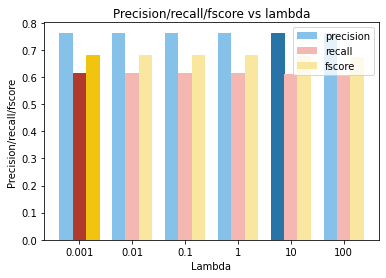

In [90]:
plot_pre(prec_logreg, recal_logreg, fscore_logreg,lamb)

training max accuracy: 0.7108433734939759
test max accuracy: 0.7823223570190642


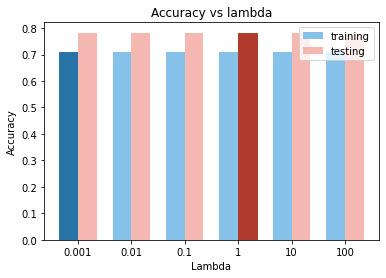

In [91]:
plot_acc(acc_train_logreg, acc_test_logreg, lamb)

In [92]:
# #plot_learning_curve(linear_model.LogisticRegression(penalty='l1', solver= 'saga', max_iter=4000, class_weight = 'balanced').fit(X_train, Y_train))
# plot_learning_curve(linear_model.LogisticRegression(penalty='l1', C=c, solver= 'saga', max_iter=4000, class_weight={0:16, 1:84}), X_train, Y_train, X_test, Y_test)

In [93]:
def logreg_model2(c , X_train, Y_train, X_test, Y_test):
    logreg = linear_model.LogisticRegression(penalty='l2', C=c, max_iter=4000)
    logreg.fit(X_train, Y_train)
    Yhat_train = logreg.predict(X_train)
    acc_train = logreg.score(X_train, Y_train)
    acc_train_logreg2.append(acc_train)
    
    Yhat_test = logreg.predict(X_test)
    acc_test = logreg.score(X_test, Y_test)
    acc_test_logreg2.append(acc_test)
    weight_logreg2.append(np.append(logreg.coef_[0],logreg.intercept_[0]))

    prec, recal, fscore, support = precision_recall_fscore_support(Y_train,  Yhat_train, average = 'binary')
    prec_logreg2.append(prec)
    recal_logreg2.append(recal)
    fscore_logreg2.append(fscore)
    return logreg

In [94]:
acc_train_logreg2 = [] 
acc_test_logreg2 = []
weight_logreg2=[]
intercept_logreg2=[]
prec_logreg2=[]
recal_logreg2=[]
fscore_logreg2=[]
for c in cVals:
    logreg_model2(c, X_train, Y_train, X_test, Y_test)
weight_results.extend(weight_logreg2)
acc_train_results.append(acc_train_logreg2)
acc_test_results.append(acc_test_logreg2)

0.7823223570190642 10


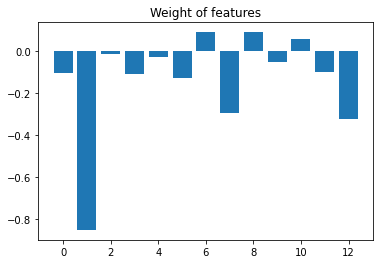

In [95]:
plot_weight(acc_test_logreg2, weight_logreg2)

max precision: 0.7619991193306913
max recall: 0.6132175761871014
max fscore: 0.6795601806400943


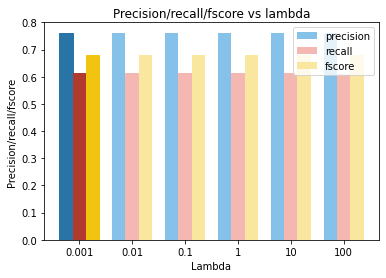

In [96]:
plot_pre(prec_logreg2, recal_logreg2, fscore_logreg2,lamb)

training max accuracy: 0.7108433734939759
test max accuracy: 0.7823223570190642


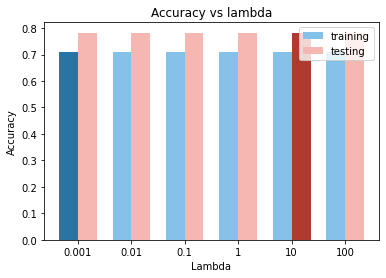

In [97]:
plot_acc(acc_train_logreg2, acc_test_logreg2, lamb)

In [98]:
from sklearn.preprocessing import PolynomialFeatures

In [99]:
poly = PolynomialFeatures(2)

In [100]:
X_transformed = poly.fit_transform(df1[:,:-1])
scaler = preprocessing.StandardScaler().fit(X_transformed)
X_transformed = scaler.transform(X_transformed)
X_transformed_train, X_transformed_test, Y_train, Y_test = train_test_split(X_transformed, Y, test_size=0.25, random_state=42)

In [101]:
acc_train_logreg = []
acc_test_logreg = []
weight_logreg=[]
intercept_logreg=[]
prec_logreg=[]
recal_logreg=[]
fscore_logreg=[]
for c in cVals:
    logreg_model(c, X_transformed_train, Y_train, X_transformed_test, Y_test)
acc_train_results.append(acc_train_logreg)
acc_test_results.append(acc_test_logreg)

0.8610648918469218 0.1


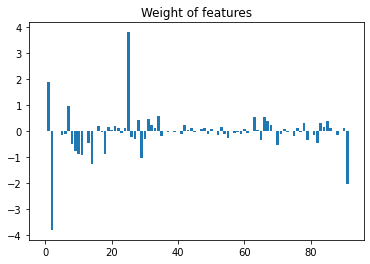

In [102]:
plot_weight(acc_test_logreg, weight_logreg)

max precision: 0.5924855491329479
max recall: 0.3513281919451585
max fscore: 0.44109736417428724


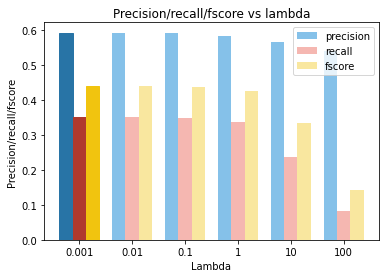

In [103]:
plot_pre(prec_logreg, recal_logreg, fscore_logreg,lamb)

training max accuracy: 0.85591457495493
test max accuracy: 0.8610648918469218


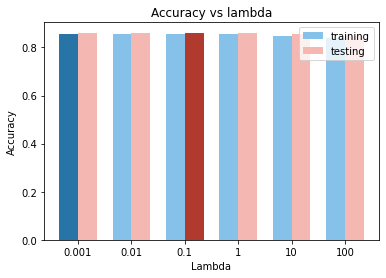

In [104]:
plot_acc(acc_train_logreg, acc_test_logreg, lamb)

In [105]:
acc_train_logreg2 = []
acc_test_logreg2 = []
weight_logreg2=[]
intercept_logreg2=[]
prec_logreg2=[]
recal_logreg2=[]
fscore_logreg2=[]
for c in cVals:
    logreg_model2(c, X_transformed_train, Y_train, X_transformed_test, Y_test)
acc_train_results.append(acc_train_logreg2)
acc_test_results.append(acc_test_logreg2)

0.8610648918469218 0.1


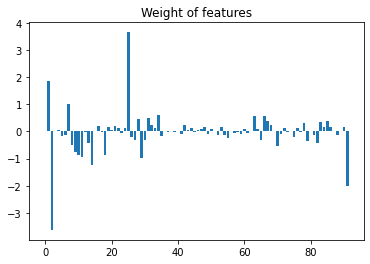

In [106]:
plot_weight(acc_test_logreg2, weight_logreg2)

max precision: 0.5928057553956835
max recall: 0.35304198800342756
max fscore: 0.4425349087003222


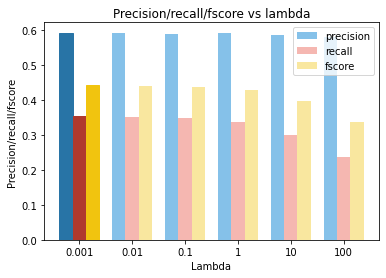

In [107]:
plot_pre(prec_logreg2, recal_logreg2, fscore_logreg2,lamb)

training max accuracy: 0.8560532519761476
test max accuracy: 0.8610648918469218


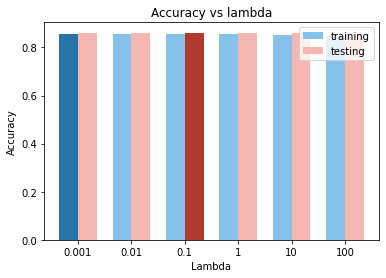

In [108]:
plot_acc(acc_train_logreg2, acc_test_logreg2, lamb)

In [109]:
#np2 = np.array(weight_results)
#df_weight =  pd.DataFrame(weight_results, columns = df.columns)
# df_weight.to_csv('logistic_weight.csv')

In [110]:
df_weight = pd.DataFrame(weight_results, columns = df.columns.to_list()[:-1]+['intercept'], index=['logistic_linear(lasso), lambda=0.001','logistic_linear(lasso), lambda=0.01','logistic_linear(lasso), lambda=0.1','logistic_linear(lasso), lambda=1','logistic_linear(lasso), lambda=10','logistic_linear(lasso), lambda=100','logistic_linear(ridge), lambda=0.001','logistic_linear(ridge), lambda=0.01','logistic_linear(ridge), lambda=0.1','logistic_linear(ridge), lambda=1','logistic_linear(ridge), lambda=10','logistic_linear(ridge), lambda=100'])
df_weight.to_csv('weight_logistic.csv')

In [111]:
df_train = pd.DataFrame(np.array(acc_train_results).T, index = lamb, columns=['logistic_linear(lasso)','logistic_linear(ridge)','logistic_poly(lasso)','logistic_poly(ridge)'])
df_train.to_csv('acc_train_logistic.csv')

In [112]:
df_test = pd.DataFrame(np.array(acc_test_results).T, index = lamb, columns=['logistic_linear(lasso)','logistic_linear(ridge)','logistic_poly(lasso)','logistic_poly(ridge)'])
df_test.to_csv('acc_test_logistic.csv')